# Deep Learning with Python

## 6.1  Working with text data

> Processando dados de texto

Use redes neurais de aprendizado profundo para processar dados de texto, semelhantes a imagens, mas também vetorizar os dados: texto -> tensor numérico.

Para fazer isso, você pode transformar cada palavra em um vetor, pode transformar um caractere em um vetor e pode transformar várias palavras ou caracteres consecutivos (chamados * N-gramas *) em um vetor.

Independentemente de como dividir, chamamos a unidade de divisão de texto de * tokens * (marcas), e o processo de divisão de texto é chamado de * tokenização * (segmentação de palavra).

> Observação: a tradução chinesa do token é "Mark" 😂. Essas traduções são estranhas. Embora token tenha o significado de uma marca, traduzir o token aqui em uma marca não tem sabor interno. Acho que token é o significado de usar uma coisa em nome de outra. Esse tipo de token é uma coisa física, como um voucher. A palavra "marca" é usada como substantivo no dicionário para significar "marcas para marcar", e não acho que as marcas sejam muito substanciais. Um voucher não é um token, pode-se dizer que é uma marca. Da mesma forma, o token aqui também é um tipo de coisa física. Não acho que possa ser chamado de "marca". Não concordo com este método de tradução, portanto, todos os tokens envolvidos no seguinte são escritos como "token" em vez de "marca".


A vetorização do texto é fazer a segmentação da palavra primeiro, depois os tokens gerados são correspondidos aos vetores numéricos um a um e, finalmente, os vetores numéricos correspondentes são sintetizados em um tensor que expressa o texto original. Entre eles, o mais interessante é como estabelecer a conexão entre token e vetor numérico. Aqui estão duas maneiras de fazer isso: codificação one-hot (codificação one-hot) e incorporação de token (incorporação de marca), entre as quais a incorporação de token é geralmente usada para palavras , Denominado "incorporação de palavras".

Mais informações: https://ilumeo.com.br/todos-posts/2020/06/12/um-guia-para-pnl-processamento-de-linguagem-natural

Antes de mais nada os notebooks aqui mostrado tiveram como base/foram retirados dos seguintes repositórios: 
 > https://github.com/fchollet/deep-learning-with-python-notebooks 
 
 
 > https://github.com/cdfmlr/Deep-Learning-with-Python-Notebooks
 
 Sugiro fortemente que consultem os códigos originais e em caso de dúvida podem me contatar para conversarmos. 

### n-gramas e pacote de palavras

n-gram é uma coleção de ≤N palavras consecutivas que podem ser extraídas de uma frase. Por exemplo: "O gato sentou no tapete."

Esta frase decomposta em 2 gramas é:

`` `
{"O", "O gato", "gato", "gato sentou", "sentou",
  "sentou em", "em", "no", "em no", "no tapete", "tapete"}
`` `

Este conjunto é denominado saco de 2 gramas (saco de 2 gramas).

Decomposto em 3 gramas é:

`` `
{"O", "O gato", "gato", "o gato sentou", "O gato sentou",
  "sentou", "sentou em", "em", "gato sentou em", "em", "em",
  "sentou no", "no tapete", "no tapete", "no tapete"}
`` `

Este conjunto é denominado saco de 3 gramas (saco de 3 gramas).

Essa coisa é chamada de "bolsa" porque é apenas uma coleção de tokens, sem a ordem e o significado do texto original. O método de segmentação de palavras para dividir o texto em tais sacos é denominado "saco de palavras".

Como o pacote de palavras não preserva a ordem (a separação é um conjunto, não uma sequência), geralmente não é usado no aprendizado profundo. Mas no modelo de processamento de texto leve e raso, n-grama e pacote de palavras ainda são métodos muito importantes.

### Codificação one-hot (one-hot encoding)

One-hot é relativamente básico e comumente usado. O método consiste em associar cada token a um índice inteiro único e, em seguida, converter o índice inteiro i em um vetor binário de comprimento N (N é o tamanho do vocabulário). Esse vetor tem apenas o i-ésimo elemento de 1 e o resto dos elementos são 0 .

Link: https://medium.com/@arthurlambletvaz/one-hot-encoding-o-que-%C3%A9-cd2e8d302ae0

Aqui estão duas versões de brinquedo de exemplos de codificação one-hot:

In [1]:
# Codificação one-hot para palavra

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
# Segmente a amostra. Considere apenas as primeiras palavras max_length de cada amostra
max_length = 10 #nesse caso as 10 primeiras palavras

results = np.zeros(shape=(len(samples), 
                          max_length, 
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [3]:
# One-hot encodging para caractere 
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable    # Todos os caracteres ASCII imprimíveis
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.
        
print(results)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Keras tem uma ferramenta de codificação one-hot integrada que é muito mais poderosa do que a versão teste recém-escrita. No uso real, você deve usar este método em vez da versão escrita anteriormente:

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)    # Considere apenas as 1000 palavras mais comuns
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)    # Converte uma string em uma lista de índices inteiros
print('sequences:', sequences)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')  # Obtenha representação binária one-hot diretamente

word_index = tokenizer.word_index    # O índice de palavras é o dicionário de vocabulário, você pode restaurar os dados com isso

print(f'one_hot_results: shape={one_hot_results.shape}:\n', one_hot_results, )
print(f'Found {len(word_index)} unique tokens.', 'word_index:', word_index)

sequences: [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
one_hot_results: shape=(2, 1000):
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Found 9 unique tokens. word_index: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


Há também uma variante simples dessa codificação one-hot chamada * truque de hashing one-hot *. A ideia desse método não é associar um índice inteiro único a cada token, mas usar uma função hash Para funcionar, o texto é mapeado diretamente em um vetor de comprimento fixo.

Desta forma, você pode economizar a sobrecarga de memória para manter o índice de palavras e também pode implementar a codificação online (codificar um por um sem afetar os subsequentes); mas existem algumas desvantagens: podem ocorrer conflitos de hash e os dados codificados não podem ser usados. redução.

In [23]:
# Codificação one-hot no nível da palavra usando técnicas de hash, versão de brinquedo

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000  # Salve a palavra como um vetor de comprimento 1000. Quanto mais palavras houver, maior será o valor, caso contrário, o conflito de hash pode aumentar
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality  # Hash a palavra em um índice inteiro aleatório no intervalo de 0 ~ dimensionalidade
        results[i, j, index] = 1.

print(results.shape)
print(results)

(2, 10, 1000)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### Incorporação de palavras

No exemplo anterior, você também pode ver que o vetor de resultado obtido pela codificação one-hot é muito esparso e tem uma dimensão relativamente alta.

A incorporação de palavras é outro método comum de associação de palavras a vetores. Este método pode obter uma codificação mais densa e de baixa dimensão do que um hot. O resultado da incorporação de palavras é aprendido a partir dos dados.

Existem duas maneiras de usar a incorporação de palavras:

1. Use a camada de incorporação para aprender a incorporação de palavras: aprenda a incorporação de palavras enquanto realiza a tarefa principal (como classificação de documento ou previsão de sentimento): comece com um vetor de palavras aleatório e, em seguida, use o mesmo peso para o vetor de palavras que a rede neural de aprendizagem Maneira de aprender.
2. Use incorporação de palavras pré-treinada: pré-treine a incorporação de palavras em uma tarefa de aprendizado de máquina diferente do problema a ser resolvido e, em seguida, carregue-a no modelo.


#### Use a camada de incorporação para aprender a incorporação de palavras

Um espaço de incorporação de palavras ideal deve ser capaz de mapear a linguagem humana perfeitamente. Tem uma estrutura realista, palavras semelhantes devem estar relativamente próximas no espaço e a direção em que as palavras estão inseridas no espaço também deve ser significativa.
Neste espaço de incorporação de palavras, animais de estimação estão na posição inferior e os animais selvagens estão na posição superior, então um vetor de baixo para cima deve representar animais de estimação para animais selvagens, este vetor é de gato para tigre Ou cachorro -> lobo. Da mesma forma, um vetor da esquerda para a direita pode ser interpretado como de cão para gato, esse vetor pode ser de cão para gato ou de lobo para tigre.

Para ser mais complicado, por exemplo, se você quiser expressar a relação de gênero de uma palavra, adicione o vetor rei ao vetor feminino, você deve obter o vetor rainha e a relação plural: rei + plural == reis ......

Portanto, é difícil ter uma palavra tão perfeita incorporando espaço, e ela ainda não está lá. Mas, usando o aprendizado profundo, ainda podemos obter um espaço de incorporação de palavras melhor para um problema específico. No Keras, precisamos apenas deixar o modelo aprender o peso de uma camada de incorporação para obter a palavra espaço de incorporação para a tarefa atual:

In [24]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(1000, 64)  # Incorporação (número de tokens possíveis, dimensão de incorporação)

A camada de incorporação é, na verdade, equivalente a um dicionário, que mapeia um índice inteiro que representa uma palavra específica para um vetor de palavras.



A entrada da camada de incorporação é um tensor inteiro bidimensional de forma `(amostras, comprimento_de_sequência)`. Um elemento neste tensor de entrada é uma sequência de inteiros que representa uma sequência de texto. Todas as sequências de entrada devem ser mantidas com o mesmo comprimento. Sequências mais curtas devem ser preenchidas com 0 e as sequências mais longas devem ser truncadas.

A saída da camada Embedding é um tensor de ponto flutuante tridimensional com a forma `(samples, sequence_length, embedding_dimensionality)`. Esta saída pode ser processada por RNN ou Conv1D para outras coisas.

A camada de Embedding também é inicializada de forma aleatória no início.Durante o processo de treinamento, a retropropagação será usada para ajustar gradativamente o vetor de palavras e alterar a estrutura espacial, aproximando-se passo a passo do estado ideal que mencionamos anteriormente.

Exemplo: Use a camada Embedding para processar a previsão de emoção da resenha de filme IMDB.

In [25]:
# Carregar dados IMDB, prontos para serem usados na camada de incorporação

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000    # Número de palavras como características
maxlen = 20    # Truncar texto após palavras de recurso maxlen

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Converta uma lista de inteiros em um tensor de forma inteiro bidimensional (amostras, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [28]:
# Use camada de incorporação e classificador em dados IMDB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))  # (samples, maxlen, 8)
model.add(Flatten())  # (samles, maxlen*8)
model.add(Dense(1, activation='sigmoid'))  # top classifier

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6686 - acc: 0.6145 - val_loss: 0.6152 - val_acc: 0.6952
Epoch 2/10
625/625 [==============================] - 1s 929us/step - loss: 0.5370 - acc: 0.7525 - val_loss: 0.5214 - val_acc: 0.7318
Epoch 3/10
625/625 [==============================] - 1s 878us/step - loss: 0.4573 - acc: 0.7895 - val_loss: 0.497

Aqui, usamos apenas uma camada Densa para completar a classificação após expandir a sequência de incorporação de palavras, o que fará com que o modelo processe cada palavra na sequência de entrada separadamente, sem considerar a relação entre as palavras e a estrutura da frase. Isso fará com que a modelo pense que "este filme é uma bomba" e "este filme é a bomba" são críticas negativas. Para aprender a frase inteira, você precisa usar RNN ou Conv1D, que será apresentado mais tarde.

#### Use incorporação de palavras pré-treinada

Assim como quando usamos redes pré-treinadas ao fazer visão computacional, usamos embeddings de palavras pré-treinadas quando temos menos dados e emprestamos recursos comuns de modelos reutilizáveis ​​treinados por outros.

A incorporação de palavras gerais geralmente é calculada usando estatísticas de frequência de palavras. Agora, existem muitas opções para nós, como word2vec, GloVe, etc. Os princípios específicos são mais complicados, portanto, podemos usá-los primeiro.

Tentaremos usar o GloVe nos exemplos abaixo.

### Do texto original à incorporação de palavras

Tentamos começar com os dados IMDB originais (ou seja, muito texto), processar os dados e fazer a incorporação de palavras.

#### Baixe o texto original dos dados IMDB

O conjunto de dados IMDB original pode ser baixado de [http://mng.bz/0tIo](http://mng.bz/0tIo) (finalmente, vá para http://s3.amazonaws.com/ a partir de s3 text-datasets / aclImdb.zip, a Internet é lenta se não for científica).

O conjunto de dados baixado fica assim após a descompressão:

`` `
aclImdb
├── teste
│ ├── neg
│ └── pos
└── trem
     ├── neg
     └── pos
`` `
Sob cada diretório neg / pos há um grande número de arquivos `.txt`, cada um contendo um comentário.

Em seguida, convertemos os comentários do trem em uma lista de strings, um comentário por string, e gravamos o rótulo correspondente (neg / pos) na lista de rótulos.

In [43]:
# Processando tags para dados brutos IMDB

import os

imdb_dir = '/Volumes/WD/Files/dataset/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

texts = []
labels = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)


In [44]:
print(labels[0], texts[0], sep=' --> ')
print(labels[-1], texts[-1], sep=' --> ')
print(len(texts), len(labels))

0 --> Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
1 --> Enchanted April is a tone poem, an impressionist painting, a masterpiece of conveying a message with few words. It has been one of my 10 favorite films since it came out. I continue to wait, albeit less patiently, for the film to come out in DVD format. Apparently, I am not alone.<br /><br />If parent company Amazon's listings are correct, there are many people who want this title in DVD format. Many people want to go to Italy with this cast and this script. Many people want to keep a permanent copy of this film in their libraries. The cast is spectacular, the cinematography and direction impeccable. The film is a definite keeper. Many have already asked. Please add our names to the list.
25000 25000


#### Segmentação de dados

Agora vamos segmentar as palavras e dividir o conjunto de treinamento e validação definido pelo caminho. Para experimentar a incorporação de palavras pré-treinamento, tornaremos o conjunto de treinamento menor, deixando apenas 200 dados para treinamento.

In [45]:
# Segmentação de texto de dados brutos IMDB

import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100  # Basta olhar para as primeiras 100 palavras de cada comentário
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Dados codificados
indices = np.arange(labels.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Divida os conjuntos de treinamento e validação
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### Baixar GloVe word embedding

Baixe a incorporação de palavras GloVe pré-treinada: [http://nlp.stanford.edu/data/glove.6B.zip](http://nlp.stanford.edu/data/glove.6B.zip)

Anote-o e descompacte-o.O vetor de incorporação de palavras 100-dimensional de 400.000 tokens treinados é armazenado em texto simples.

#### Pré-processando a incorporação

Analise o arquivo descompactado:

In [46]:
glove_dir = '...glove.6B'

embeddings_index = {}

with open(os.path.join(glove_dir, 'glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


Então, temos que construir uma matriz de incorporação que pode ser carregada na camada de incorporação, e sua forma é `(max_words, embedding_dim)`.

In [47]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)  # Alguns usam a palavra vetor em embeddings_index
        if embedding_vector is not None:               # Use todos os zeros
            embedding_matrix[i] = embedding_vector
            
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.071953    0.23127     0.023731   ... -0.71894997  0.86894
   0.19539   ]
 ...
 [-0.44036001  0.31821999  0.10778    ... -1.29849994  0.11824
   0.64845002]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.54539001 -0.31817999 -0.016281   ... -0.44865     0.067047
   0.17975999]]


#### Defina o modelo

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### Carregar a palavra GloVe embutida no modelo

In [49]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#### Modelo de treinamento e avaliação

In [51]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 0s 64ms/step - loss: 1.3595 - acc: 0.5150 - val_loss: 0.6871 - val_acc: 0.5490
Epoch 2/10
7/7 [==============================] - 0s 42ms/step - loss: 0.6846 - acc: 0.7950 - val_loss: 0.7569 - val_acc: 0.5217
Epoch 3/10
7/7 [==============================] - 0s 42ms/step - loss: 0.3757 - acc: 0.8900 - val_loss: 0.8181 - val_acc: 0.5189
Epoch 4/10
7/7 [==============================] - 0s 41ms/step - loss: 0.3464 - acc: 0.8800 - val_loss: 0.8497 - val_acc: 0.4971
Epoch 5/10
7/7 [==============================] - 0s 41ms/step - loss: 0.2278 - acc: 0.9600 - val_loss: 0.8661 - val_acc: 0.5308
Epoch 6/10
7/7 [==============================] - 0s 42ms/step - loss: 0.1328 - acc: 0.9950 - val_loss: 0.6977 - val_acc: 0.5895
Epoch 7/10
7/7 [==============================] - 0s 42ms/step - loss: 0.1859 - acc: 0.9250 - val_loss: 0.6923 - val_acc: 0.5867
Epoch 8/10
7/7 [==============================] - 0s 42ms/step - loss: 0.0950 - acc: 0.9950 - val

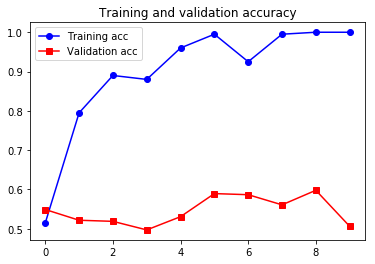

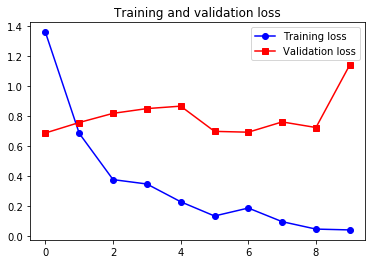

In [52]:
# Resultado do sorteio

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Ainda é muito difícil usar apenas 200 amostras de treinamento, mas os embeddings de palavras pré-treinados ainda obtêm bons resultados. Como comparação, veja como seria sem o pré-treinamento:

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 72ms/step - loss: 0.6972 - acc: 0.4600 - val_loss: 0.6921 - val_acc: 0.5150
Epoch 2/10
7/7 [==============================] - 0s 46ms/step - loss: 0.4991 - acc: 1.0000 - val_loss: 0.6901 - 

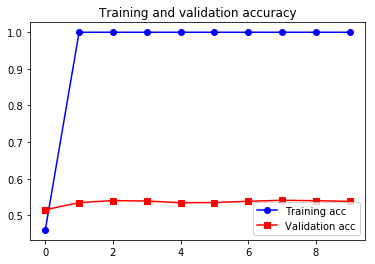

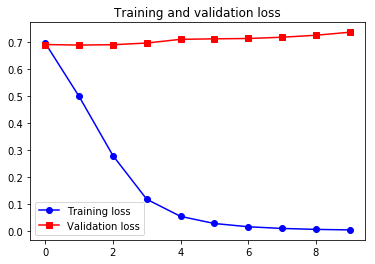

In [53]:
# Modelo de construção

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Não use incorporação de palavras GloVe

# Treinamento

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

# Resultado do sorteio

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Pode-se ver que, neste exemplo, o desempenho da palavra embedding pré-treinada é melhor do que a palavra embedding aprendida com a tarefa. Mas se houver muitos dados disponíveis, usar uma camada de incorporação para treinar com a tarefa geralmente é mais poderoso do que usar a incorporação de palavras pré-treinada.

Por fim, observe os resultados do conjunto de teste:

In [54]:
# Segmentação de dados de teste

test_dir = os.path.join(imdb_dir, 'test')

texts = []
labels = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname)) as f:
                texts.append(f.read())
            labels.append(0 if label_type == 'neg' else 1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

# Avalie o modelo no conjunto de teste

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 983us/step - loss: 1.1397 - acc: 0.5127


[1.1397335529327393, 0.512719988822937]